In [108]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime

In [109]:
pp = pd.read_csv('precipitation.txt')

ParserError: Error tokenizing data. C error: Expected 1 fields in line 17, saw 2


In [110]:
pp = pd.read_csv('precipitation.txt',skiprows=28)
pp.head()

,agency_cd\tsite_no\tdatetime\t20300_00045_00006\t20300_00045_00006_cd
0,5s\t15s\t20d\t14n\t10s
1,USGS\t393938104572101\t2009-05-05\t0.00\tA
2,USGS\t393938104572101\t2009-05-06\t0.00\tA
3,USGS\t393938104572101\t2009-05-07\t0.00\tA
4,USGS\t393938104572101\t2009-05-08\t0.01\tA


In [111]:
pp = pd.read_csv('precipitation.txt',skiprows=28, delimiter='\t',)
pp.head()

,agency_cd,site_no,datetime,20300_00045_00006,20300_00045_00006_cd
0,5s,15s,20d,14n,10s
1,USGS,393938104572101,2009-05-05,0.00,A
2,USGS,393938104572101,2009-05-06,0.00,A
3,USGS,393938104572101,2009-05-07,0.00,A
4,USGS,393938104572101,2009-05-08,0.01,A


In [112]:
pp = pp.iloc[1:]
pp.head()

,agency_cd,site_no,datetime,20300_00045_00006,20300_00045_00006_cd
1,USGS,393938104572101,2009-05-05,0.00,A
2,USGS,393938104572101,2009-05-06,0.00,A
3,USGS,393938104572101,2009-05-07,0.00,A
4,USGS,393938104572101,2009-05-08,0.01,A
5,USGS,393938104572101,2009-05-09,0.08,A


In [113]:
pp.columns = ['Agency', 'SiteNumber', 'datetime', 'pp' , 'code']
pp.head()

,Agency,SiteNumber,datetime,pp,code
1,USGS,393938104572101,2009-05-05,0.00,A
2,USGS,393938104572101,2009-05-06,0.00,A
3,USGS,393938104572101,2009-05-07,0.00,A
4,USGS,393938104572101,2009-05-08,0.01,A
5,USGS,393938104572101,2009-05-09,0.08,A


In [114]:
pp = pp.rename(columns = {'datetime':'Datetime','pp':"Precipitation_in",'code':"Code"})
pp.head()

,Agency,SiteNumber,Datetime,Precipitation_in,Code
1,USGS,393938104572101,2009-05-05,0.00,A
2,USGS,393938104572101,2009-05-06,0.00,A
3,USGS,393938104572101,2009-05-07,0.00,A
4,USGS,393938104572101,2009-05-08,0.01,A
5,USGS,393938104572101,2009-05-09,0.08,A


In [115]:
pp.reset_index()

,index,Agency,SiteNumber,Datetime,Precipitation_in,Code
0,1,USGS,393938104572101,2009-05-05,0.00,A
1,2,USGS,393938104572101,2009-05-06,0.00,A
2,3,USGS,393938104572101,2009-05-07,0.00,A
3,4,USGS,393938104572101,2009-05-08,0.01,A
4,5,USGS,393938104572101,2009-05-09,0.08,A
...,...,...,...,...,...,...
4170,4171,USGS,393938104572101,2020-10-04,NaN,NaN
4171,4172,USGS,393938104572101,2020-10-05,NaN,NaN
4172,4173,USGS,393938104572101,2020-10-06,NaN,NaN
4173,4174,USGS,393938104572101,2020-10-07,Ssn,P


In [116]:
pp = pp.reset_index(drop=True)
pp.head()

,Agency,SiteNumber,Datetime,Precipitation_in,Code
0,USGS,393938104572101,2009-05-05,0.00,A
1,USGS,393938104572101,2009-05-06,0.00,A
2,USGS,393938104572101,2009-05-07,0.00,A
3,USGS,393938104572101,2009-05-08,0.01,A
4,USGS,393938104572101,2009-05-09,0.08,A


In [117]:
pp['Precipitation_in'].plot()

TypeError: no numeric data to plot

In [118]:
pp['Precipitation_in'].tail()

4170    NaN
4171    NaN
4172    NaN
4173    Ssn
4174    Ssn
Name: Precipitation_in, dtype: object

In [119]:
pd.to_numeric(pp['Precipitation_in'])

ValueError: Unable to parse string "Ssn" at position 4173

In [120]:
pd.to_numeric(pp['Precipitation_in'], errors='coerce')

0       0.00
1       0.00
2       0.00
3       0.01
4       0.08
        ... 
4170     NaN
4171     NaN
4172     NaN
4173     NaN
4174     NaN
Name: Precipitation_in, Length: 4175, dtype: float64

In [121]:
pd.to_numeric(pp['Precipitation_in'], errors='coerce').notnull()

0        True
1        True
2        True
3        True
4        True
        ...  
4170    False
4171    False
4172    False
4173    False
4174    False
Name: Precipitation_in, Length: 4175, dtype: bool

In [122]:
pp_filtered = pp[pd.to_numeric(pp['Precipitation_in'], errors='coerce').notnull()]
pp_filtered.head()

,Agency,SiteNumber,Datetime,Precipitation_in,Code
0,USGS,393938104572101,2009-05-05,0.00,A
1,USGS,393938104572101,2009-05-06,0.00,A
2,USGS,393938104572101,2009-05-07,0.00,A
3,USGS,393938104572101,2009-05-08,0.01,A
4,USGS,393938104572101,2009-05-09,0.08,A


In [123]:
pp_filtered['Precipitation_in'][0]

'0.00'

In [124]:
pp_filtered['Precipitation_in'] = pd.to_numeric(pp_filtered['Precipitation_in'])

<ipython-input-124-aa05d2a3e60f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pp_filtered['Precipitation_in'] = pd.to_numeric(pp_filtered['Precipitation_in'])


In [125]:
pp_filtered['Precipitation_in'][0], pp_filtered['Precipitation_in'][0].dtype

(0.0, dtype('float64'))

<AxesSubplot:>

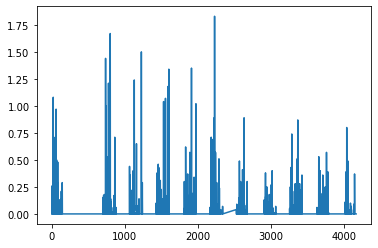

In [126]:
pp_filtered['Precipitation_in'].plot()

In [127]:
pp_filtered['Datetime'].dtype

dtype('O')

In [128]:
pd.to_datetime(pp_filtered['Datetime'])[0]

Timestamp('2009-05-05 00:00:00')

In [129]:
pp_filtered['Datetime'] = pd.to_datetime(pp_filtered['Datetime'])
pp_filtered['Datetime'].iloc[0]

<ipython-input-129-a6c8bbb1e016>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pp_filtered['Datetime'] = pd.to_datetime(pp_filtered['Datetime'])


Timestamp('2009-05-05 00:00:00')

In [130]:
pp_filtered = pp_filtered.set_index('Datetime')
pp_filtered.head()

,Agency,SiteNumber,Precipitation_in,Code
Datetime,,,,
2009-05-05,USGS,393938104572101,0.00,A
2009-05-06,USGS,393938104572101,0.00,A
2009-05-07,USGS,393938104572101,0.00,A
2009-05-08,USGS,393938104572101,0.01,A
2009-05-09,USGS,393938104572101,0.08,A


<AxesSubplot:xlabel='Datetime'>

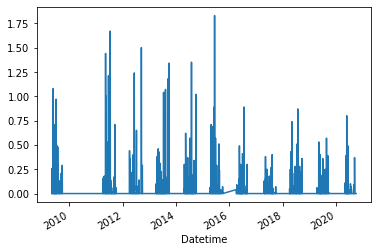

In [131]:
pp_filtered['Precipitation_in'].plot()

<AxesSubplot:xlabel='Datetime'>

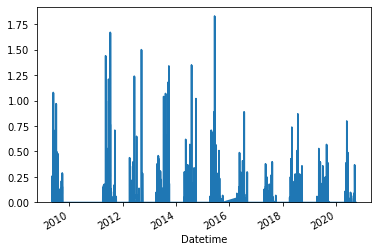

In [132]:
pp_filtered['Precipitation_in'].plot(kind='area')

<AxesSubplot:ylabel='Frequency'>

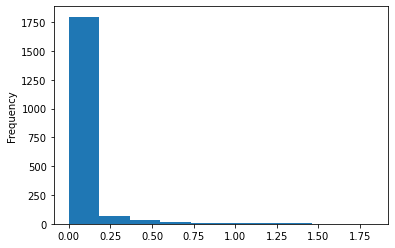

In [133]:
pp_filtered['Precipitation_in'].plot(kind='hist')

<AxesSubplot:>

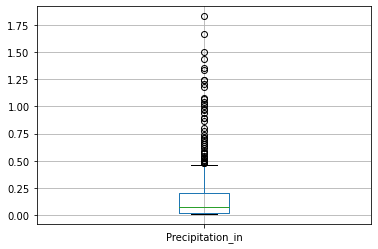

In [134]:
pp_filtered[pp_filtered['Precipitation_in']>0].boxplot()

In [135]:
pp_filtered['Precipitation_in'].plot(kind='scatter')

ValueError: plot kind scatter can only be used for data frames

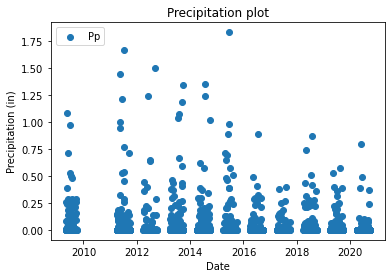

In [138]:
fig, ax = plt.subplots()
ax.scatter(pp_filtered.index, pp_filtered['Precipitation_in'].values, label='Pp')
ax.set_xlabel('Date')
ax.set_ylabel('Precipitation (in)')
ax.set_title('Precipitation plot')
ax.legend(loc='upper left')
plt.show()

In [139]:
pp_filtered.index.max(),pp_filtered.index.min()

(Timestamp('2020-09-30 00:00:00'), Timestamp('2009-05-05 00:00:00'))

In [140]:
pp_filtered['Precipitation_in'].describe()

count    1941.000000
mean        0.046208
std         0.155938
min         0.000000
25%         0.000000
50%         0.000000
75%         0.010000
max         1.830000
Name: Precipitation_in, dtype: float64

In [141]:
pp_filtered['Precipitation_in'].loc['2019-07-01':'2020-06-30'].describe()

count    180.000000
mean       0.027278
std        0.100961
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        0.800000
Name: Precipitation_in, dtype: float64

<AxesSubplot:xlabel='Datetime'>

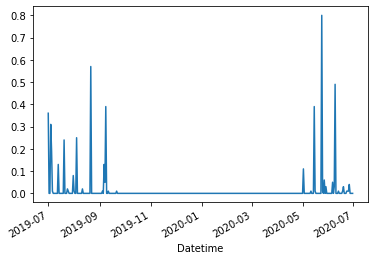

In [142]:
pp_filtered['Precipitation_in'].loc['2019-07-01':'2020-06-30'].plot()

<AxesSubplot:xlabel='Datetime'>

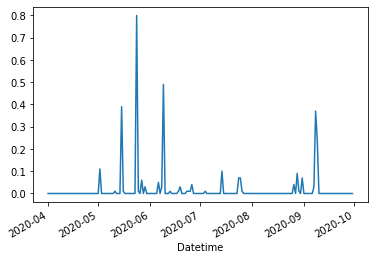

In [143]:
pp_filtered['Precipitation_in'].loc['2020-04-1':].plot()

<AxesSubplot:xlabel='Datetime'>

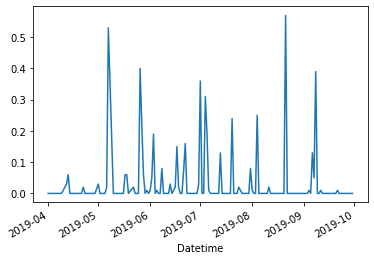

In [144]:
pp_filtered['Precipitation_in'].loc['2019-04-1':'2019-09-30'].plot()

In [145]:
y2019 = pp_filtered['Precipitation_in'].loc['2019-04-1':'2019-09-30']
y2018 = pp_filtered['Precipitation_in'].loc['2018-04-1':'2018-09-30']
y2017 = pp_filtered['Precipitation_in'].loc['2017-04-1':'2017-09-30']
y2016 = pp_filtered['Precipitation_in'].loc['2016-04-1':'2016-09-30']
y2015 = pp_filtered['Precipitation_in'].loc['2015-04-1':'2015-09-30']

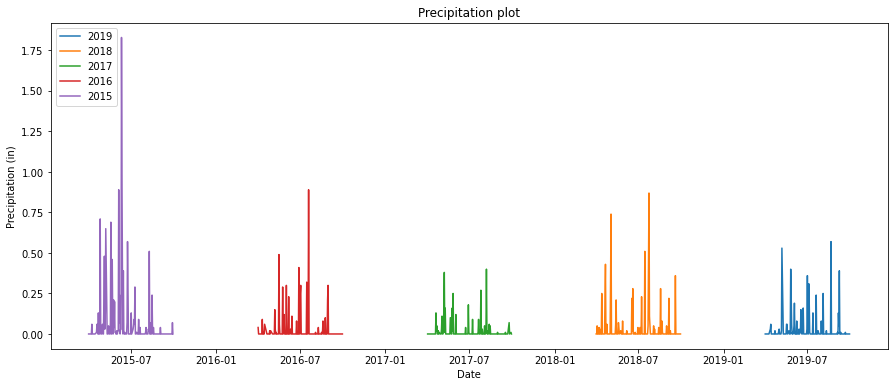

In [146]:
fig, ax = plt.subplots(figsize=(15,6))
ax.plot(y2019.index, y2019, label='2019')
ax.plot(y2018.index, y2018, label='2018')
ax.plot(y2017.index, y2017, label='2017')
ax.plot(y2016.index, y2016, label='2016')
ax.plot(y2015.index, y2015, label='2015')
ax.set_xlabel('Date')
ax.set_ylabel('Precipitation (in)')
ax.set_title('Precipitation plot')
ax.legend(loc='upper left')
plt.show()

In [147]:
y2019.shape,y2018.shape,y2017.shape,y2016.shape,y2015.shape

((176,), (183,), (170,), (176,), (177,))

In [148]:
pp['Datetime']=pd.to_datetime(pp['Datetime'])
pp_ordered = pp.set_index('Datetime')
pp_ordered['Precipitation_in'] = pd.to_numeric(pp_ordered['Precipitation_in'], errors='coerce')
pp_ordered.head()

,Agency,SiteNumber,Precipitation_in,Code
Datetime,,,,
2009-05-05,USGS,393938104572101,0.00,A
2009-05-06,USGS,393938104572101,0.00,A
2009-05-07,USGS,393938104572101,0.00,A
2009-05-08,USGS,393938104572101,0.01,A
2009-05-09,USGS,393938104572101,0.08,A


In [149]:
y2019 = pp_ordered['Precipitation_in'].loc['2019-04-1':'2019-09-30']
y2018 = pp_ordered['Precipitation_in'].loc['2018-04-1':'2018-09-30']
y2017 = pp_ordered['Precipitation_in'].loc['2017-04-1':'2017-09-30']
y2016 = pp_ordered['Precipitation_in'].loc['2016-04-1':'2016-09-30']
y2015 = pp_ordered['Precipitation_in'].loc['2015-04-1':'2015-09-30']

In [150]:
y2019.shape,y2018.shape,y2017.shape,y2016.shape,y2015.shape

((183,), (183,), (183,), (183,), (183,))

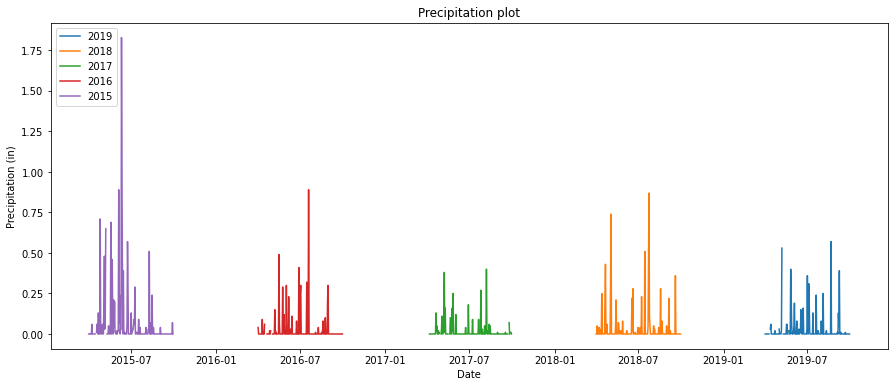

In [151]:
fig, ax = plt.subplots(figsize=(15,6))
ax.plot(y2019.index, y2019, label='2019')
ax.plot(y2018.index, y2018, label='2018')
ax.plot(y2017.index, y2017, label='2017')
ax.plot(y2016.index, y2016, label='2016')
ax.plot(y2015.index, y2015, label='2015')
ax.set_xlabel('Date')
ax.set_ylabel('Precipitation (in)')
ax.set_title('Precipitation plot')
ax.legend(loc='upper left')
plt.show()

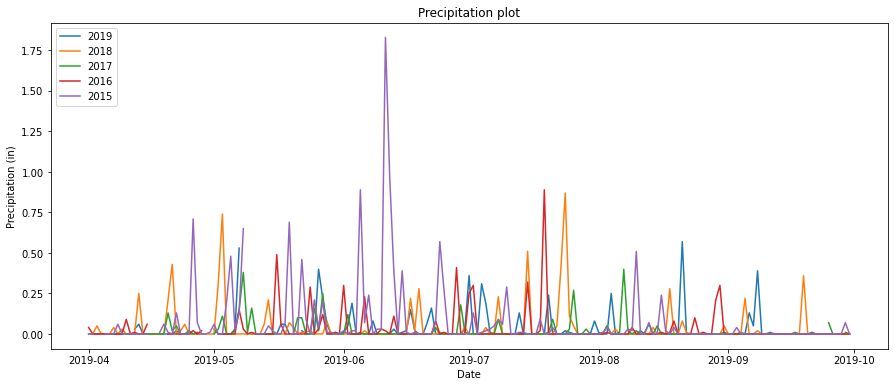

In [152]:
fig, ax = plt.subplots(figsize=(15,6))
ax.plot(y2019.index, y2019.values, label='2019')
ax.plot(y2019.index, y2018.values, label='2018')
ax.plot(y2019.index, y2017, label='2017')
ax.plot(y2019.index, y2016, label='2016')
ax.plot(y2019.index, y2015, label='2015')
ax.set_xlabel('Date')
ax.set_ylabel('Precipitation (in)')
ax.set_title('Precipitation plot')
ax.legend(loc='upper left')
plt.show()

In [153]:
len(pp_ordered['Precipitation_in']) - pp_ordered['Precipitation_in'].count()

2234

In [154]:
pp_ordered['Precipitation_in'].isnull().sum()

2234

In [155]:
pp_ordered.index[-1] - pp_ordered.index[0]

Timedelta('4174 days 00:00:00')

In [156]:
pp_ordered.index[0] + datetime.timedelta(days=4174)

Timestamp('2020-10-08 00:00:00')

In [157]:
pp_ordered['Day'] = pp_ordered.index.day
pp_ordered['Month'] = pp_ordered.index.month
pp_ordered['Year'] = pp_ordered.index.year
pp_ordered

,Agency,SiteNumber,Precipitation_in,Code,Day,Month,Year
Datetime,,,,,,,
2009-05-05,USGS,393938104572101,0.00,A,5,5,2009
2009-05-06,USGS,393938104572101,0.00,A,6,5,2009
2009-05-07,USGS,393938104572101,0.00,A,7,5,2009
2009-05-08,USGS,393938104572101,0.01,A,8,5,2009
2009-05-09,USGS,393938104572101,0.08,A,9,5,2009
...,...,...,...,...,...,...,...
2020-10-04,USGS,393938104572101,NaN,NaN,4,10,2020
2020-10-05,USGS,393938104572101,NaN,NaN,5,10,2020
2020-10-06,USGS,393938104572101,NaN,NaN,6,10,2020


In [158]:
pp_ordered.groupby('Year').count()

,Agency,SiteNumber,Precipitation_in,Code,Day,Month
Year,,,,,,
2009,241,241,149,149,241,241
2010,365,365,0,0,365,365
2011,365,365,187,187,365,365
2012,366,366,183,183,366,366
2013,365,365,183,183,365,365
2014,365,365,178,178,365,365
2015,365,365,177,177,365,365
2016,366,366,176,176,366,366
2017,365,365,170,170,365,365


In [159]:
pp_ordered.groupby('Month').count()

,Agency,SiteNumber,Precipitation_in,Code,Day,Year
Month,,,,,,
1,341,341,0,0,341,341
2,311,311,0,0,311,311
3,341,341,0,0,341,341
4,330,330,273,273,330,330
5,368,368,327,327,368,368
6,360,360,330,330,360,360
7,372,372,341,341,372,372
8,372,372,340,340,372,372
9,360,360,326,326,360,360


In [160]:
pp_ordered[['Month','Precipitation_in']].loc['2019-1-1':'2019-12-31'].groupby('Month').sum()

,Precipitation_in
Month,
1,0.00
2,0.00
3,0.00
4,0.11
5,1.41
6,0.83
7,1.35
8,0.85
9,0.60


<AxesSubplot:xlabel='Month'>

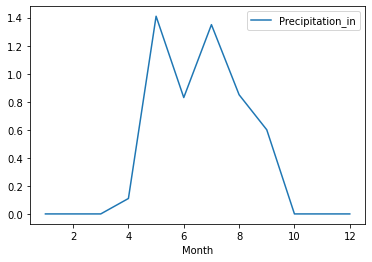

In [161]:
pp_ordered[['Month','Precipitation_in']].loc['2019-1-1':'2019-12-31'].groupby('Month').sum().plot()

<AxesSubplot:xlabel='Year'>

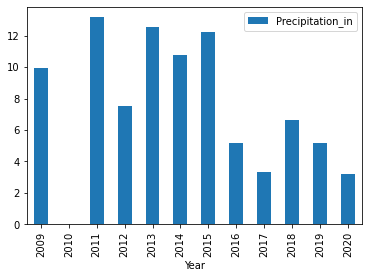

In [162]:
pp_ordered[['Year','Precipitation_in']].groupby('Year').sum().plot(kind='bar')

In [163]:
pp_ordered.to_csv('pp.csv')

## Streamflow

In [164]:
streamflow = pd.read_csv('streamflow.txt',skiprows=30,delimiter='\t',names=['Agency', 'SiteNumber', 'Date', 'Flow_cfs' , 'Code']).iloc[1:]
streamflow.head()

,Agency,SiteNumber,Date,Flow_cfs,Code
1,USGS,06719505,2000-01-01,83.0,A:e
2,USGS,06719505,2000-01-02,83.0,A:e
3,USGS,06719505,2000-01-03,84.0,A:e
4,USGS,06719505,2000-01-04,82.0,A:e
5,USGS,06719505,2000-01-05,81.0,A:e


In [165]:
streamflow['Flow_cfs'] = pd.to_numeric(streamflow['Flow_cfs'],errors='coerce')
streamflow.head()

,Agency,SiteNumber,Date,Flow_cfs,Code
1,USGS,06719505,2000-01-01,83.0,A:e
2,USGS,06719505,2000-01-02,83.0,A:e
3,USGS,06719505,2000-01-03,84.0,A:e
4,USGS,06719505,2000-01-04,82.0,A:e
5,USGS,06719505,2000-01-05,81.0,A:e


In [166]:
streamflow['Date'] = pd.to_datetime(streamflow['Date'])
streamflow['Date'][1]

Timestamp('2000-01-01 00:00:00')

In [167]:
streamflow = streamflow.set_index('Date')
streamflow.head()

,Agency,SiteNumber,Flow_cfs,Code
Date,,,,
2000-01-01,USGS,06719505,83.0,A:e
2000-01-02,USGS,06719505,83.0,A:e
2000-01-03,USGS,06719505,84.0,A:e
2000-01-04,USGS,06719505,82.0,A:e
2000-01-05,USGS,06719505,81.0,A:e


<AxesSubplot:xlabel='Date'>

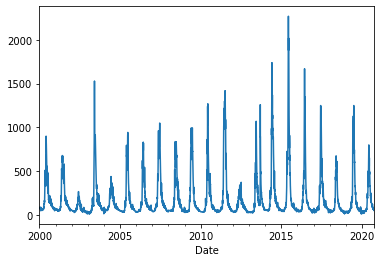

In [168]:
streamflow['Flow_cfs'].plot()

In [169]:
streamflow = streamflow.loc[pp_ordered.index.min():pp_ordered.index.max()]
streamflow.head()

,Agency,SiteNumber,Flow_cfs,Code
Date,,,,
2009-05-05,USGS,06719505,198.0,A
2009-05-06,USGS,06719505,196.0,A
2009-05-07,USGS,06719505,235.0,A
2009-05-08,USGS,06719505,286.0,A
2009-05-09,USGS,06719505,290.0,A


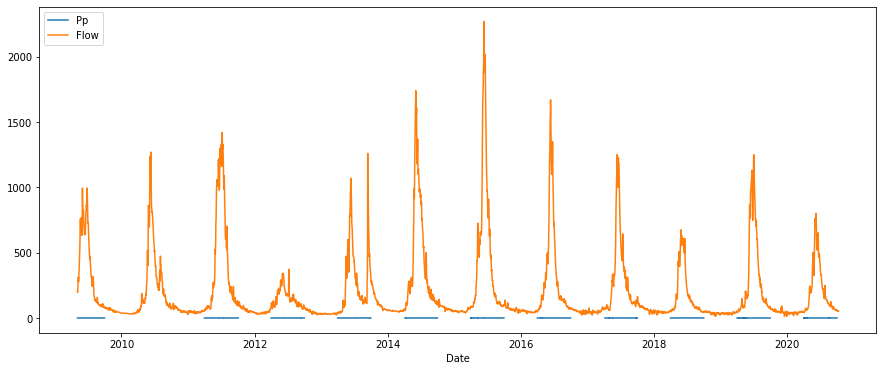

In [170]:
fig, ax = plt.subplots(figsize=(15,6))
ax.plot(pp_ordered.index, pp_ordered['Precipitation_in'], label='Pp')
ax.plot(streamflow.index, streamflow['Flow_cfs'], label='Flow')
ax.set_xlabel('Date')
ax.legend(loc='upper left')
plt.show()

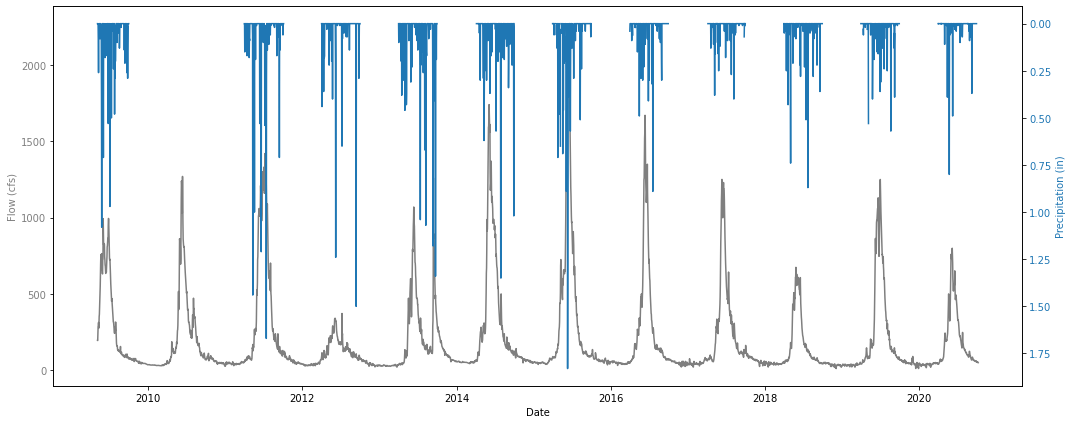

In [171]:
fig, ax = plt.subplots(figsize=(15,6))

color = 'tab:gray'
ax.set_xlabel('Date')
ax.set_ylabel('Flow (cfs)', color=color)
ax.plot(streamflow.index, streamflow['Flow_cfs'], color=color)
ax.tick_params(axis='y', labelcolor=color)

ax1 = ax.twinx()

color = 'tab:blue'
ax1.set_ylabel('Precipitation (in)', color=color)#, color=color
ax1.plot(pp_ordered.index, pp_ordered['Precipitation_in'], color=color)
ax1.tick_params(axis='y', labelcolor=color)#
ax1.set_ylim(ax1.get_ylim()[::-1])

fig.tight_layout()
plt.show()

In [70]:
streamflow.to_csv('sf.csv')